**Design and implement a CNN model for image classification.**

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

CNN model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.5271 - accuracy: 0.4437 - val_loss: 1.2784 - val_accuracy: 0.5326
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1744 - accuracy: 0.5823 - val_loss: 1.1112 - val_accuracy: 0.6069
Epoch 3/10
1563/1563 [==============================] - 59s 37ms/step - loss: 1.0173 - accuracy: 0.6416 - val_loss: 1.0007 - val_accuracy: 0.6426
Epoch 4/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.9108 - accuracy: 0.6802 - val_loss: 0.9331 - val_accuracy: 0.6780
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8419 - accuracy: 0.7067 - val_loss: 0.8976 - val_accuracy: 0.6914
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7817 - accuracy: 0.7261 - val_loss: 0.8624 - val_accuracy: 0.7001
Epoch 7/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.7256 - accuracy: 0.7455 - val_loss: 0.8463 -

Model evaluation

313/313 - 7s - loss: 0.8509 - accuracy: 0.7196 - 7s/epoch - 23ms/step


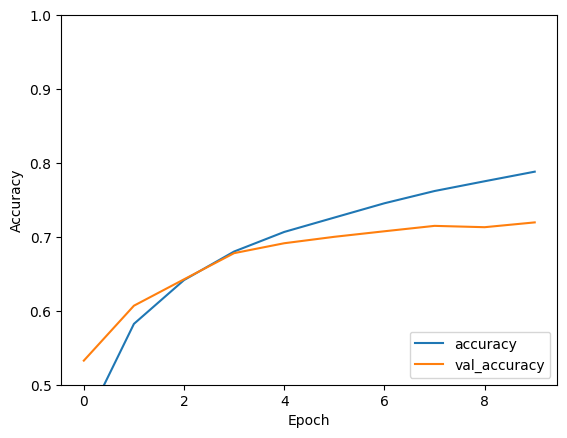

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

Image classification

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = '/content/airplane.png'
img = image.load_img(img_path, target_size=(32, 32))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0

predictions = model.predict(img)
predicted_class = np.argmax(predictions)


1/1 [==============================] - 0s 108ms/step


In [ ]:
predicted_label = class_names[predicted_class]
print(predicted_label)

airplane
